# Comprehensive Exploratory Analysis of Global Air Quality Trends

## Project Overview

- Problem Statement: Conduct an exploratory data analysis (EDA) of air quality data to uncover patterns, peak pollution periods, and differences in pollution levels across various cities.

- Scope: Utilize public air quality datasets, focusing on pollutants such as PM2.5, PM10, NO2, and O3, to perform a comprehensive EDA.
---

## 1. Imports

In [173]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## 2. Loading the data

In [174]:
air = pd.read_csv('./datasets/AirQuality_data.csv')
air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,26.0,1360.0,150.0,119.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,136.0,489.0,7578.0
1,10/03/2004,19.00.00,2.0,1292.0,112.0,94.0,955.0,103.0,1174.0,92.0,1559.0,972.0,133.0,477.0,7255.0
2,10/03/2004,20.00.00,22.0,1402.0,88.0,90.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,119.0,540.0,7502.0
3,10/03/2004,21.00.00,22.0,1376.0,80.0,92.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,110.0,600.0,7867.0
4,10/03/2004,22.00.00,16.0,1272.0,51.0,65.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,112.0,596.0,7888.0


## 3. Data Cleaning

In [175]:
# Confirm the information about the dataframe
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


The datatypes are reasonable but the number of total entries surpasses the non-null count, but all columns have the same non-null count

In [176]:
# CHeck null values per column
air.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

Taking a closer look at it...

In [177]:
air[air['Date'].isnull()]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So we find that there were just redunddant rows below the entries. We will drop them all

In [178]:
# Drop null rows
air.dropna(inplace = True)
# Check info again
air.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [179]:
# The distribution of the data
air.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-36.996687,1048.990061,-159.090093,18.656834,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,168.190232,465.260981,9846.342524
std,211.793927,329.832710,139.789093,413.802064,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,114.081191,216.407635,4447.196714
min,-2000.000000,-200.000000,-200.000000,-2000.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,4.000000,921.000000,-200.000000,40.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,109.000000,341.000000,6923.000000
50%,14.000000,1053.000000,-200.000000,79.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,172.000000,486.000000,9768.000000
75%,25.000000,1221.000000,-200.000000,136.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,241.000000,619.000000,12962.000000
max,119.000000,2040.000000,1189.000000,637.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,446.000000,887.000000,22310.000000


In [180]:
# Identify columns to check for negative values
columns_to_check = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
                    'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 
                    'T', 'RH', 'AH']

# Filter the DataFrame to include rows with negative values in any of the specified columns
negative_values_subset = air[air[columns_to_check].lt(0).any(axis=1)]

# Display the subset
print(negative_values_subset.head())
negative_values_subset.shape

          Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
9   11/03/2004  03.00.00     6.0       1010.0      19.0      17.0   
10  11/03/2004  04.00.00  -200.0       1011.0      14.0      13.0   
33  12/03/2004  03.00.00     8.0        889.0      21.0      19.0   
34  12/03/2004  04.00.00  -200.0        831.0      10.0      11.0   
39  12/03/2004  09.00.00  -200.0       1545.0    -200.0     221.0   

    PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
9           561.0   -200.0        1705.0   -200.0        1235.0        501.0   
10          527.0     21.0        1818.0     34.0        1197.0        445.0   
33          574.0   -200.0        1680.0   -200.0        1187.0        512.0   
34          506.0     21.0        1893.0     32.0        1134.0        384.0   
39         1353.0   -200.0         767.0   -200.0        2058.0       1588.0   

        T     RH      AH  
9   103.0  602.0  7517.0  
10  101.0  605.0  7465.0  
33   70.0  623.0  6261.

(8530, 15)

### Observations
- Negative Values for concentration is *problematic* since concentration is non-negative which raises the suspicion of either **missing data** or **measurement errors**
- The negative values have caused a skew in the mean (such as CO(GT) (-36.99) and NMHC(GT) (-159.09)), standard deviation, and quartiles for the columns that have the negative values and this will mislead the analysis.
- The high standard deviation might also be to **outliers**.
- The minimum value for multiple columns is -200.000000. Given that pollutant concentrations and environmental metrics typically cannot be negative, these values are likely placeholders for missing data.
- The 25th percentile for NMHC(GT) is -200.0, indicating that at least 25% of the data in this column is the placeholder value. This suggests a significant portion of the data is missing or invalid.


However, the documentation, which can be found at https://www.kaggle.com/datasets/fedesoriano/air-quality-data-set states clearly that **Missing values are tagged with -200 value**.

### Replacing the Placeholder Values

In [181]:
# Replace all values less than 0 with np.nan
air[air[columns_to_check] < 0] = np.nan
air.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8978.000000,8991.000000,8991.000000
mean,20.096690,1099.833166,218.811816,100.831053,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,183.455335,492.342009,10255.302747
std,14.915673,217.080037,204.459921,74.498197,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,88.083979,173.168925,4038.126060
min,1.000000,647.000000,7.000000,1.000000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,0.000000,92.000000,1847.000000
25%,9.000000,937.000000,67.000000,44.000000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,118.000000,358.000000,7368.000000
50%,17.000000,1063.000000,150.000000,82.000000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,178.000000,496.000000,9954.000000
75%,27.000000,1231.000000,297.000000,140.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,244.000000,625.000000,13137.000000
max,119.000000,2040.000000,1189.000000,637.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,446.000000,887.000000,22310.000000


### Re-check:
Checking again for how many missing values we have

In [182]:
air.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 379
RH                366
AH                366
dtype: int64

Confirming the shape before and after removing columns with more than 50% missing values

In [183]:
print(f'Shape before removal: {air.shape}')

# Drop columns with more than 50% missing values
air.dropna(thresh=len(air) * 0.5, axis=1, inplace=True)

print(f'Shape after removal: {air.shape}')
print(air.columns)

Shape before removal: (9357, 15)
Shape after removal: (9357, 14)
Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')


In [184]:
# Revisit the missing values
air_null = air.isna().sum()

# Printing out what percentage of the data is null
print(air_null/air.shape[0])


Date             0.000000
Time             0.000000
CO(GT)           0.179865
PT08.S1(CO)      0.039115
C6H6(GT)         0.039115
PT08.S2(NMHC)    0.039115
NOx(GT)          0.175163
PT08.S3(NOx)     0.039115
NO2(GT)          0.175484
PT08.S4(NO2)     0.039115
PT08.S5(O3)      0.039115
T                0.040504
RH               0.039115
AH               0.039115
dtype: float64


Since the column with the most missing data has 18% missing values, we consider the following options:
- Imputation:
  - Mean/Median Imputation: Replace missing values with the mean or median of the column.
  - Forward/Backward Fill: Use the preceding or following value to fill in the missing data.
  - Interpolation: For time series data, you might interpolate missing values based on surrounding data points.
  - K-Nearest Neighnors imputation: Flls in missing values by averaging the values of the nearest neighbors based on a distance metric.
  - Time-Series Models: Use historical data to predict missing values based on time-series trends and patterns.
- Dropping Rows: If the missing data is random and not too significant, you might drop rows with missing values.



The **most appropriate** is Interpolation since:
- the dataset is time-dependent
- we can maintain continuity
- we can remain flexible based on complexity

In [185]:
# Ensure all columns are correctly inferred as numeric where applicable
air = air.infer_objects()

# Separate numeric columns from non-numeric columns
numeric_columns = air.select_dtypes(include=['number']).columns
non_numeric_columns = air.select_dtypes(exclude=['number']).columns

# Interpolate missing values only in numeric columns
air_numeric_interpolated = air[numeric_columns].interpolate(method='linear', limit_direction='forward')

# Optionally, if you want to fill any remaining NaNs after interpolation (e.g., start/end points):
air_numeric_interpolated = air_numeric_interpolated.ffill().bfill()

# Combine interpolated numeric columns with non-numeric columns
air_interpolated = air[non_numeric_columns].join(air_numeric_interpolated)

# Check the result
print(air_interpolated.describe())

            CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  9357.000000  9357.000000  9357.000000    9357.000000  9357.000000   
mean     19.943572  1103.059741   101.791546     942.142620   241.922197   
std      14.692406   218.196346    75.038116     267.866611   204.315075   
min       1.000000   647.000000     1.000000     383.000000     2.000000   
25%       8.500000   938.000000    45.000000     736.000000    96.000000   
50%      16.000000  1067.000000    83.000000     910.012987   180.000000   
75%      28.000000  1239.000000   141.000000    1119.000000   326.000000   
max     119.000000  2040.000000   637.000000    2214.000000  1479.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   9357.000000  9357.000000   9357.000000  9357.000000  9357.000000   
mean     832.758897   109.632094   1453.298814  1032.544298   182.366945   
std      255.709833    46.462311    343.206131   404.447613    87.752152   
min      32

### Visualization of Current state of data

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns to plot
columns_to_plot = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'NO2(GT)', 'T']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=2, figsize=(15, 3 * len(columns_to_plot)))

# Plot histograms for key columns
for i, col in enumerate(columns_to_plot):
    # Plot histogram for original data
    sns.histplot(air[col], bins=50, kde=True, color='orange', alpha=0.5, ax=axes[i, 0])
    axes[i, 0].set_title(f'Original {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')
    
    # Plot histogram for interpolated data
    sns.histplot(air_interpolated[col], bins=50, kde=True, color='green', alpha=0.5, ax=axes[i, 1])
    axes[i, 1].set_title(f'Interpolated {col}')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# Box plots to check for outliers
# Add a column to indicate the data source
air_original = air.copy()
air_original['Source'] = 'Original'
air_interpolated['Source'] = 'Interpolated'

# Concatenate the original and imputed DataFrames
combined_data = pd.concat([air_original[columns_to_plot + ['Source']], air_interpolated[columns_to_plot + ['Source']]])

# Plot box plots for comparison
plt.figure(figsize=(10, 5))
sns.boxplot(x='variable', y='value', hue='Source', data=pd.melt(combined_data, id_vars=['Source'], value_vars=columns_to_plot))
plt.title('Box Plot Comparison of Original and Interpolated Data')
plt.xticks(rotation=45)
plt.show()


### Precautionary measures

The histplots show consistency after interpolation which shows that the trends have been preserved and the interpolation is most probably valid.

However, it would be wise to check edge cases, imputation quality, data integrity, monitor the missing data, and confirm how changing the imputation method might affect the results we get

#### Edge cases

In [ ]:
# New columnsto check
new_columns = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
                    'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 
                    'T', 'RH', 'AH']

# Check for extreme values in original and imputed data
extreme_values_original = air[(air[new_columns] < -1000) | (air[new_columns] > 10000)].dropna()
extreme_values_imputed = air_interpolated[(air_interpolated[new_columns] < -1000) | (air_interpolated[new_columns] > 10000)].dropna()

print(f'Extreme values in original data:\n{extreme_values_original}')
print(f'Extreme values in imputed data:\n{extreme_values_imputed}')


Extreme values in original data:
Empty DataFrame
Columns: [Date, Time, CO(GT), PT08.S1(CO), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH]
Index: []
Extreme values in imputed data:
Empty DataFrame
Columns: [Date, Time, CO(GT), PT08.S1(CO), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH, Source]
Index: []


#### Imputation Quality

In [ ]:
# Compare mean and standard deviation
mean_original = air[new_columns].mean()
std_original = air[new_columns].std()
mean_imputed = air_interpolated[new_columns].mean()
std_imputed = air_interpolated[new_columns].std()

print(f'Mean of original data:\n{mean_original}')
print(f'Mean of imputed data:\n{mean_imputed}')
print(f'Standard deviation of original data:\n{std_original}')
print(f'Standard deviation of imputed data:\n{std_imputed}')


Mean of original data:
CO(GT)              20.096690
PT08.S1(CO)       1099.833166
C6H6(GT)           100.831053
PT08.S2(NMHC)      939.153376
NOx(GT)            246.896735
PT08.S3(NOx)       835.493605
NO2(GT)            113.091251
PT08.S4(NO2)      1456.264598
PT08.S5(O3)       1022.906128
T                  183.455335
RH                 492.342009
AH               10255.302747
dtype: float64
Mean of imputed data:
CO(GT)              19.943572
PT08.S1(CO)       1103.059741
C6H6(GT)           101.791546
PT08.S2(NMHC)      942.142620
NOx(GT)            241.922197
PT08.S3(NOx)       832.758897
NO2(GT)            109.632094
PT08.S4(NO2)      1453.298814
PT08.S5(O3)       1032.544298
T                  182.366945
RH                 491.913861
AH               10196.207759
dtype: float64
Standard deviation of original data:
CO(GT)             14.915673
PT08.S1(CO)       217.080037
C6H6(GT)           74.498197
PT08.S2(NMHC)     266.831429
NOx(GT)           212.979168
PT08.S3(NOx)      256.8

#### Data Integrity

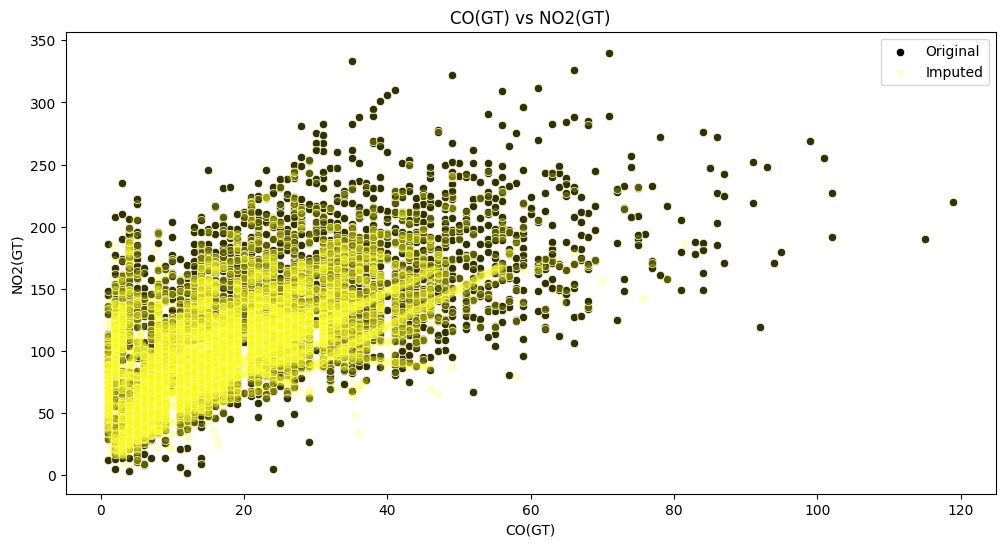

In [ ]:
# Visualize important patterns or anomalies (e.g., using scatter plots for feature relationships)
# scatter plot for original and imputed data
plt.figure(figsize=(12, 6))
sns.scatterplot(x=air['CO(GT)'], y=air['NO2(GT)'], label='Original', color = 'black')
sns.scatterplot(x=air_interpolated['CO(GT)'], y=air_interpolated['NO2(GT)'], label='Imputed', alpha=0.2, color='yellow')
plt.title('CO(GT) vs NO2(GT)')
plt.xlabel('CO(GT)')
plt.ylabel('NO2(GT)')
plt.legend()
plt.show()


#### Confirm missing data

In [ ]:
# Check the percentage of missing values before and after imputation
missing_original = air.isna().mean() * 100
missing_imputed = air_interpolated.isna().mean() * 100

print(f'Missing values in original data:\n{missing_original}')
print(f'Missing values in imputed data:\n{missing_imputed}')


Missing values in original data:
Date              0.000000
Time              0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 4.050444
RH                3.911510
AH                3.911510
dtype: float64
Missing values in imputed data:
Date             0.0
Time             0.0
CO(GT)           0.0
PT08.S1(CO)      0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
Source           0.0
dtype: float64


#### Sensitivity analysis

In [ ]:
# Perform sensitivity analysis by comparing different imputation methods (e.g., linear vs. polynomial)
air_interpolated_poly = air[new_columns].interpolate(method='polynomial', order=2, limit_direction='forward', axis=0)
mean_poly = air_interpolated_poly.mean()
std_poly = air_interpolated_poly.std()

print(f'Mean of polynomial imputed data:\n{mean_poly}')
print(f'Standard deviation of polynomial imputed data:\n{std_poly}')

# Compare with linear interpolation
print(f'Mean of linear imputed data:\n{mean_imputed}')
print(f'Standard deviation of linear imputed data:\n{std_imputed}')

Mean of polynomial imputed data:
CO(GT)              29.141867
PT08.S1(CO)       1121.784291
C6H6(GT)           110.387329
PT08.S2(NMHC)      965.820420
NOx(GT)            145.262455
PT08.S3(NOx)       806.135390
NO2(GT)             99.610609
PT08.S4(NO2)      1480.692535
PT08.S5(O3)       1062.591821
T                  182.217973
RH                 488.598239
AH               10143.898886
dtype: float64
Standard deviation of polynomial imputed data:
CO(GT)            153.549637
PT08.S1(CO)       301.658338
C6H6(GT)          115.053698
PT08.S2(NMHC)     364.185091
NOx(GT)           793.168859
PT08.S3(NOx)      429.639600
NO2(GT)           135.087115
PT08.S4(NO2)      438.700756
PT08.S5(O3)       510.337123
T                  89.039387
RH                177.150194
AH               4076.135827
dtype: float64
Mean of linear imputed data:
CO(GT)              19.943572
PT08.S1(CO)       1103.059741
C6H6(GT)           101.791546
PT08.S2(NMHC)      942.142620
NOx(GT)            241.922197
PT0

We finalize by equating the interpolated dataset to:

In [ ]:
air_df = air_interpolated.drop(columns='Source', axis=1)

## Exploratory Data Analysis

In [ ]:
air_df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,26.0,1360.0,119.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,136.0,489.0,7578.0
1,10/03/2004,19.00.00,2.0,1292.0,94.0,955.0,103.0,1174.0,92.0,1559.0,972.0,133.0,477.0,7255.0
2,10/03/2004,20.00.00,22.0,1402.0,90.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,119.0,540.0,7502.0
3,10/03/2004,21.00.00,22.0,1376.0,92.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,110.0,600.0,7867.0
4,10/03/2004,22.00.00,16.0,1272.0,65.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,112.0,596.0,7888.0


### Date and Time Analysis

In [ ]:
# Convert Date and Time to datetime
air_df['datetime'] = pd.to_datetime(air_df['Date'] + ' ' + air_df['Time'], format='%d/%m/%Y %H.%M.%S')

# Set datetime as index
air_df.set_index('datetime', inplace=True)

# Drop the original Date and Time columns
air_df.drop(['Date', 'Time'], axis=1, inplace=True)

# Plot time series for each pollutant
air_df_resampled = air_df.resample('D').mean()  # Resampling to daily averages

plt.figure(figsize=(14, 8))
for column in ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'NO2(GT)']:
    plt.plot(air_df_resampled.index, air_df_resampled[column], label=column)

plt.title('Daily Average Concentrations of Pollutants Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()

### Univariate Analysis

In [ ]:
# Plot histograms and KDE plots
plt.figure(figsize=(20, 15))
for i, column in enumerate(air_df.columns):
    plt.subplot(5, 3, i + 1)
    sns.histplot(air_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Plot box plots to detect outliers
plt.figure(figsize=(20, 15))
sns.boxplot(data=air_df)
plt.title('Box Plots of All Variables')
plt.xticks(rotation=90)
plt.show()

### Bivariate Analysis

In [ ]:
# Correlation matrix
correlation_matrix = air_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots between selected pairs of variables
sns.pairplot(air_df[['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']])
plt.show()

### Multivariate Analysis

In [ ]:
# Pairwise relationships
sns.pairplot(air_df)
plt.show()

# 3D plot (if applicable) - example with CO(GT), NOx(GT), and NO2(GT)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(air_df['CO(GT)'], air_df['NOx(GT)'], air_df['NO2(GT)'])
ax.set_xlabel('CO(GT)')
ax.set_ylabel('NOx(GT)')
ax.set_zlabel('NO2(GT)')
plt.title('3D Scatter Plot of CO(GT), NOx(GT), and NO2(GT)')
plt.show()

### Time Series Analysis

In [ ]:
# Moving averages for smoothing
air_df_resampled['CO(GT)_MA'] = air_df_resampled['CO(GT)'].rolling(window=30).mean()
air_df_resampled['NOx(GT)_MA'] = air_df_resampled['NOx(GT)'].rolling(window=30).mean()

# Plot the moving averages
plt.figure(figsize=(14, 8))
plt.plot(air_df_resampled['CO(GT)_MA'], label='CO(GT) 30-day MA')
plt.plot(air_df_resampled['NOx(GT)_MA'], label='NOx(GT) 30-day MA')
plt.title('30-Day Moving Averages of CO(GT) and NOx(GT)')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()

# Decomposition of time series
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(air_df_resampled['CO(GT)'].dropna(), model='additive', period=365)
result.plot()
plt.show()

### Outlier Detection

In [ ]:
from scipy.stats import zscore

# Calculate z-scores
z_scores = air_df.apply(zscore)

# Define outliers as data points with z-score > 3 or < -3
outliers = (z_scores.abs() > 3).sum()

outliers